In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
import hist
import mplhep as hep
hep.style.use("CMS")

In [112]:
import pickle
import numpy as np
filename = 'outputs/herwig_2011.pkl'
with open(filename, 'rb') as f:
    output_herwig = pickle.load(f)

import pickle
filename = 'outputs/pythia_2211.pkl'
with open(filename, 'rb') as f:
    output_pythia = pickle.load(f)

import pickle
filename = 'outputs/data_2018.pkl'
with open(filename, 'rb') as f:
    output_data = pickle.load(f)



In [113]:
cf_h = output_herwig['cutflow']
for outer_key, datasets in cf_h.items():
    for dataset, metrics in datasets.items():
        if 'sumw' in metrics:
            print(f"{outer_key} -> {dataset}: sumw = {metrics['sumw']}")
    

UL16NanoAODv9 -> DYJetsToLL_M-50_TuneCH3_13TeV-madgraphMLM-herwig7: sumw = 171085938.5
UL18NanoAODv9 -> DYJetsToLL_M-50_TuneCH3_13TeV-madgraphMLM-herwig7: sumw = 225886526.5
UL17NanoAODv9 -> DYJetsToLL_M-50_TuneCH3_13TeV-madgraphMLM-herwig7: sumw = 198862196.875
UL16NanoAODAPVv9 -> DYJetsToLL_M-50_TuneCH3_13TeV-madgraphMLM-herwig7: sumw = 250987411.625


In [114]:
UL16NanoAODv9_Scale  = 6.931616265498571e-01
UL16NanoAODAPVv9_Scale  = 4.067796164438715e-01
UL17NanoAODv9_Scale  = 1.2666593323872918e-00
UL18NanoAODv9_Scale  = 1.6080728168671874e-00



In [115]:
output_herwig['ptjet_mjet_u_reco']

Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9', 'UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable(array([0.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 4.0e+01,
       5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
       1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 1.8e+02, 2.0e+02,
       6.2e+03, 1.3e+04]), name='mreco', label='$m_{RECO}$ (GeV)'),
  StrCategory(['herwig'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=653005, variance=5.07541e+06)

In [116]:
output_pythia['ptjet_mjet_u_reco']


Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9', 'UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Variable([200, 260, 350, 460, 13000], name='ptreco', label='$p_{T,RECO}$ (GeV)'),
  Variable(array([0.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 3.0e+01, 4.0e+01,
       5.0e+01, 6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.1e+02,
       1.2e+02, 1.3e+02, 1.4e+02, 1.5e+02, 1.6e+02, 1.8e+02, 2.0e+02,
       6.2e+03, 1.3e+04]), name='mreco', label='$m_{RECO}$ (GeV)'),
  StrCategory(['nominal'], growth=True, name='systematic', label='Systematic Uncertainty'),
  storage=Weight()) # Sum: WeightedSum(value=379278, variance=69272)

In [125]:
output_pythia['dphi_lep_jet_reco']

Hist(
  StrCategory(['UL16NanoAODv9', 'UL18NanoAODv9', 'UL17NanoAODv9', 'UL16NanoAODAPVv9'], growth=True, name='dataset', label='Primary dataset'),
  Regular(150, -6.28319, 6.28319, name='dphi', label='$\\Delta \\phi$'),
  storage=Weight()) # Sum: WeightedSum(value=758555, variance=138544)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation/Data'))

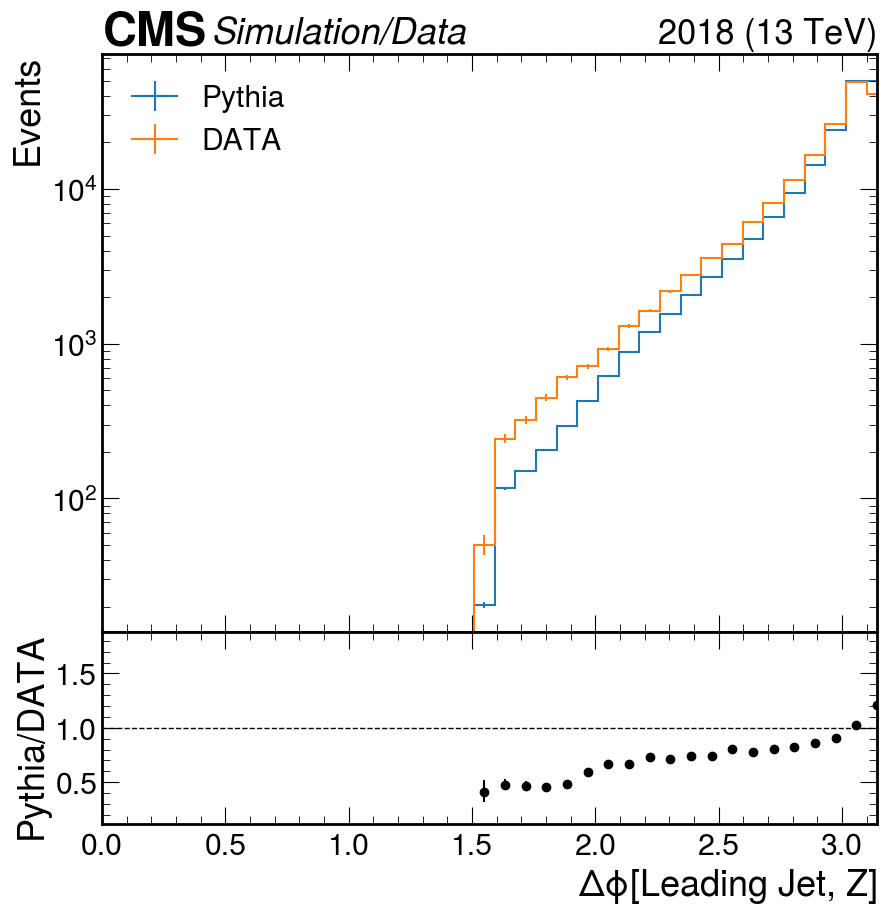

In [172]:

output_pythia['dphi_z_jet_reco'].project('dataset','dphi')["UL18NanoAODv9", :].plot_ratio(
    output_data['dphi_z_jet_reco'].project('dphi'),
    rp_ylabel=r"Pythia/DATA",
    rp_num_label="Pythia",
    rp_denom_label="DATA",
    rp_uncert_draw_type="line", 
)
fig = plt.gcf()
axes = fig.get_axes()

# Set y-axis to logarithmic scale
#axes = fig.get_axes()
axes[0].set_yscale('log')
axes[0].set_ylabel('Events')
axes[1].set_xlabel(r' $\Delta \phi$[Leading Jet, Z]')
plt.xlim(0 ,np.pi)
hep.cms.label('Simulation/Data', data = True, year = '2018', ax = axes[0], )

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation/Data'))

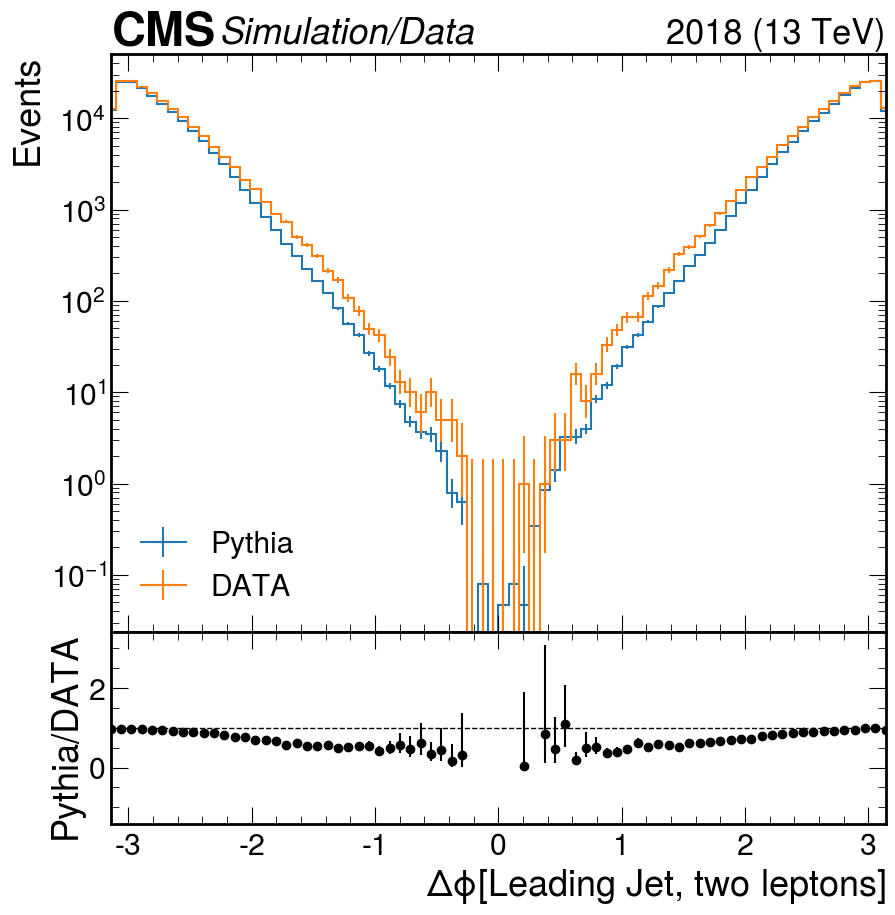

In [142]:
output_pythia['dphi_lep_jet_reco'].project('dataset','dphi')["UL18NanoAODv9", :].plot_ratio(
    output_data['dphi_lep_jet_reco'].project('dphi'),
    rp_ylabel=r"Pythia/DATA",
    rp_num_label="Pythia",
    rp_denom_label="DATA",
    rp_uncert_draw_type="line", 
)
fig = plt.gcf()
axes = fig.get_axes()

# Set y-axis to logarithmic scale
#axes = fig.get_axes()
axes[0].set_yscale('log')
axes[0].set_ylabel('Events')
axes[1].set_xlabel(r' $\Delta \phi$[Leading Jet, two leptons]')
plt.xlim(-np.pi, np.pi)
hep.cms.label('Simulation/Data', data = True, year = '2018', ax = axes[0], )


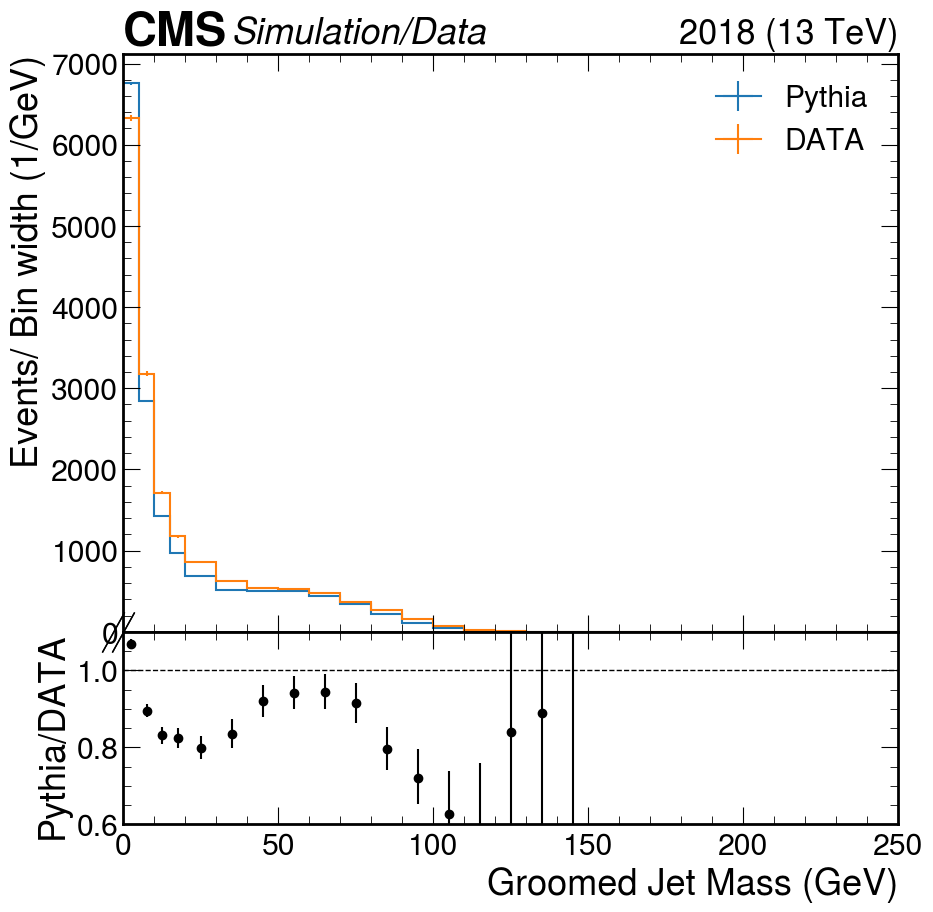

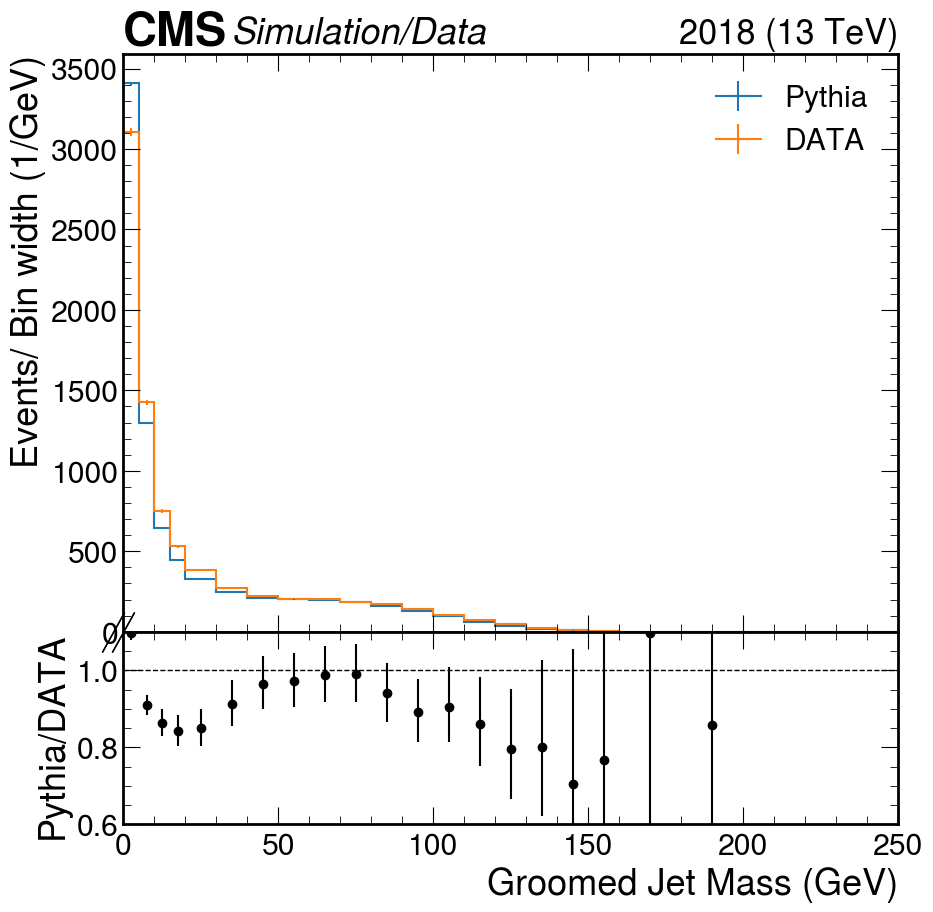

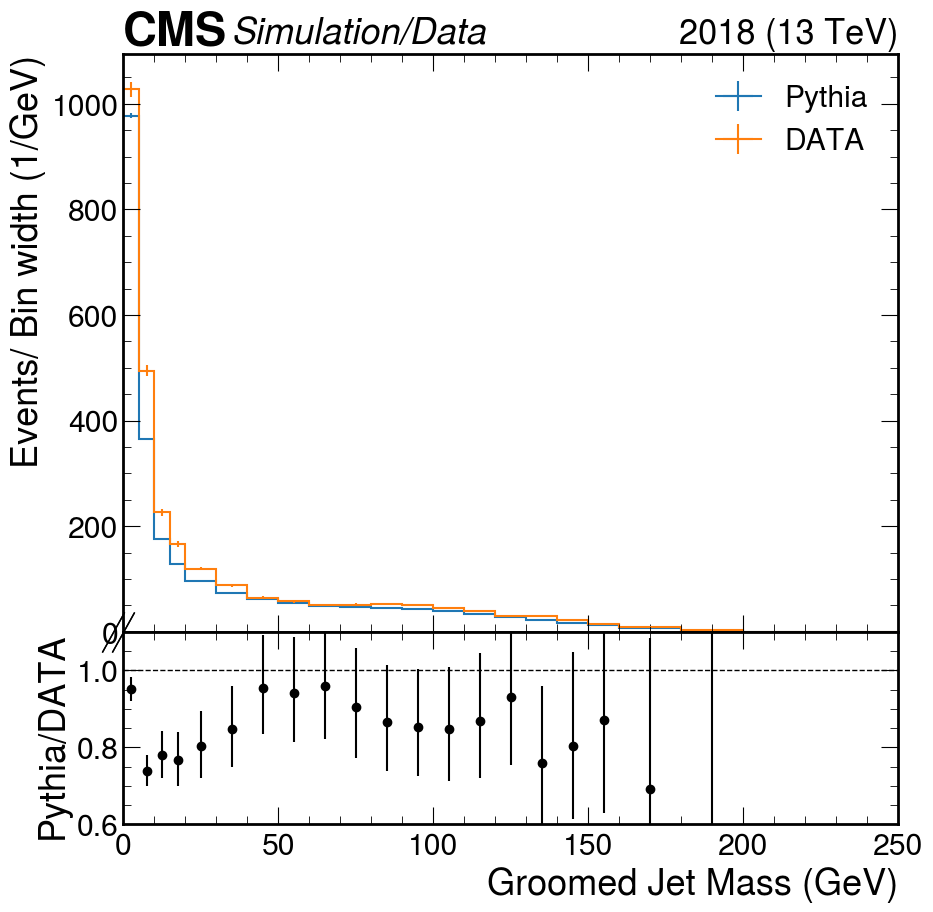

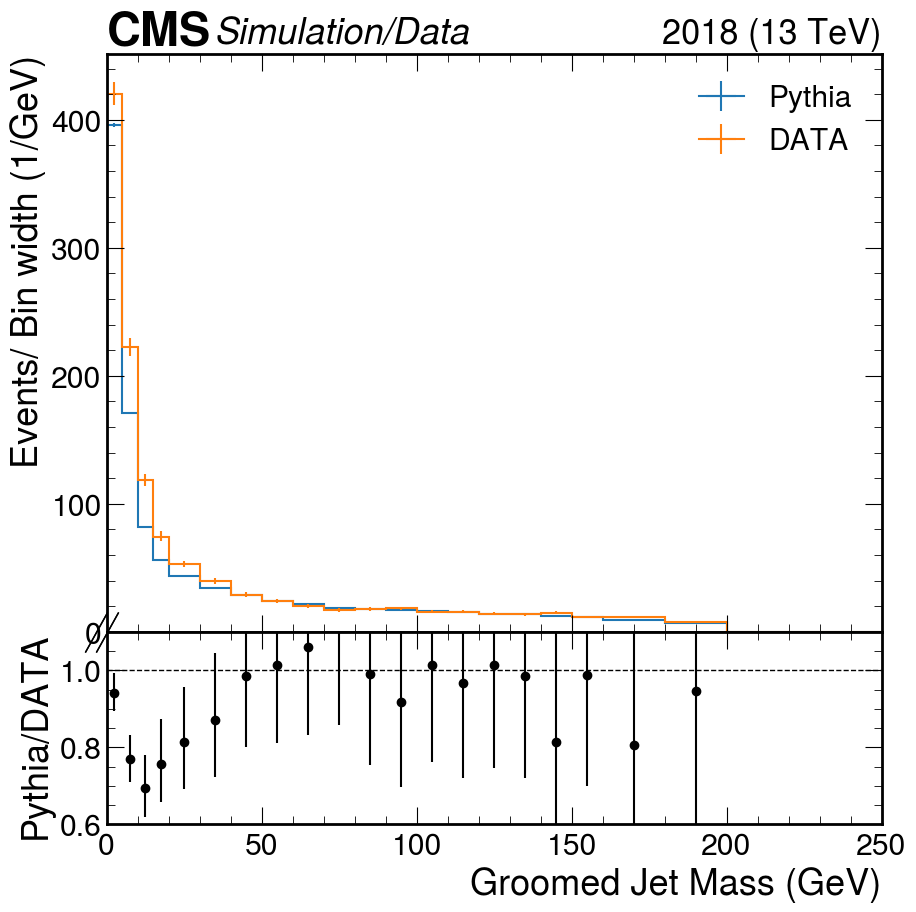

In [162]:
#fig, ax = plt.subplots()
for i in range(4):
    mreco_bin_widths = output_pythia['ptjet_mjet_g_reco'].project('dataset','mreco')["UL18NanoAODv9", :].axes['mreco'].widths
    h1 = output_pythia['ptjet_mjet_g_reco'].project('dataset','ptreco','mreco')["UL18NanoAODv9",i, :]
    h2 = output_data['ptjet_mjet_g_reco'].project('ptreco', 'mreco')[i, :]
    h1[:] = h1.view()/mreco_bin_widths
    h2[:] = h2.view()/mreco_bin_widths
    h1.plot_ratio(
        h2, 
        rp_ylabel=r"Pythia/DATA",
        rp_num_label="Pythia",
        rp_denom_label="DATA",
        rp_uncert_draw_type="line", 
    )
    fig = plt.gcf()
    axes = fig.get_axes()
    
    # Set y-axis to logarithmic scale
    #axes = fig.get_axes()
    #axes[0].set_yscale('log')
    axes[1].set_ylim(0.6, 1.1)
    plt.xlim(00, 250)
    axes[0].set_ylabel('Events/ Bin width (1/GeV)')
    axes[1].set_xlabel(r' Groomed Jet Mass (GeV)')
    
    hep.cms.label('Simulation/Data', data = True, year = '2018', ax = axes[0], )
    plt.show()

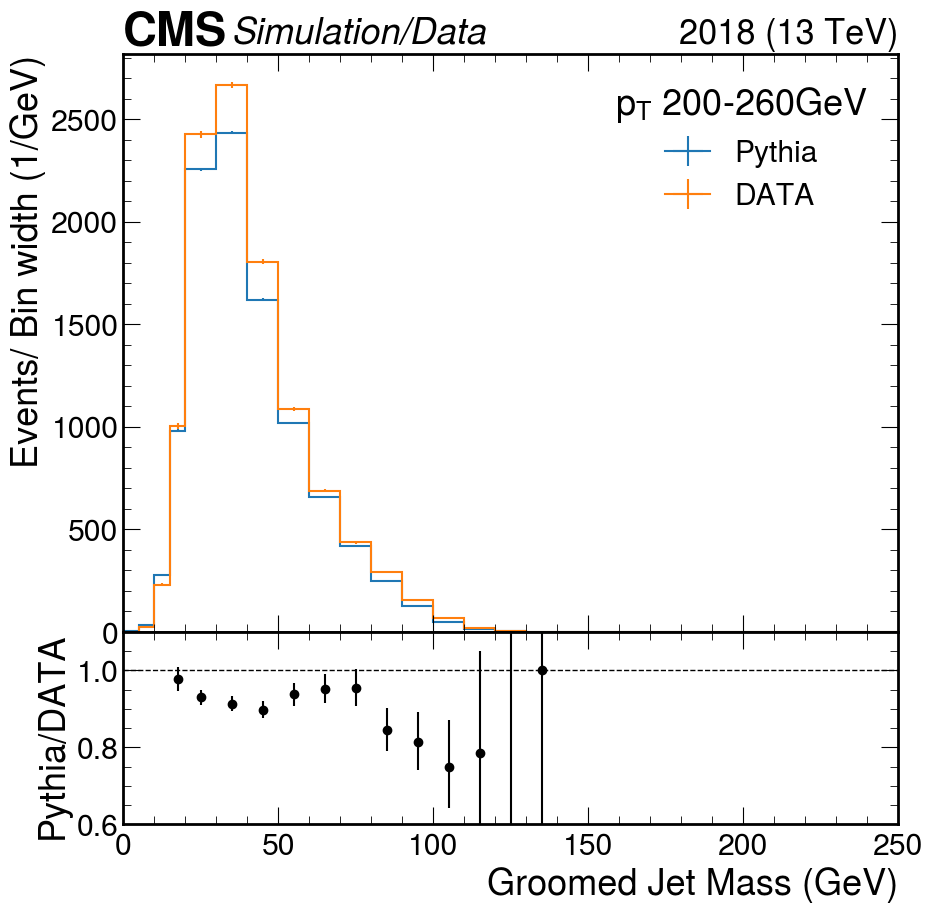

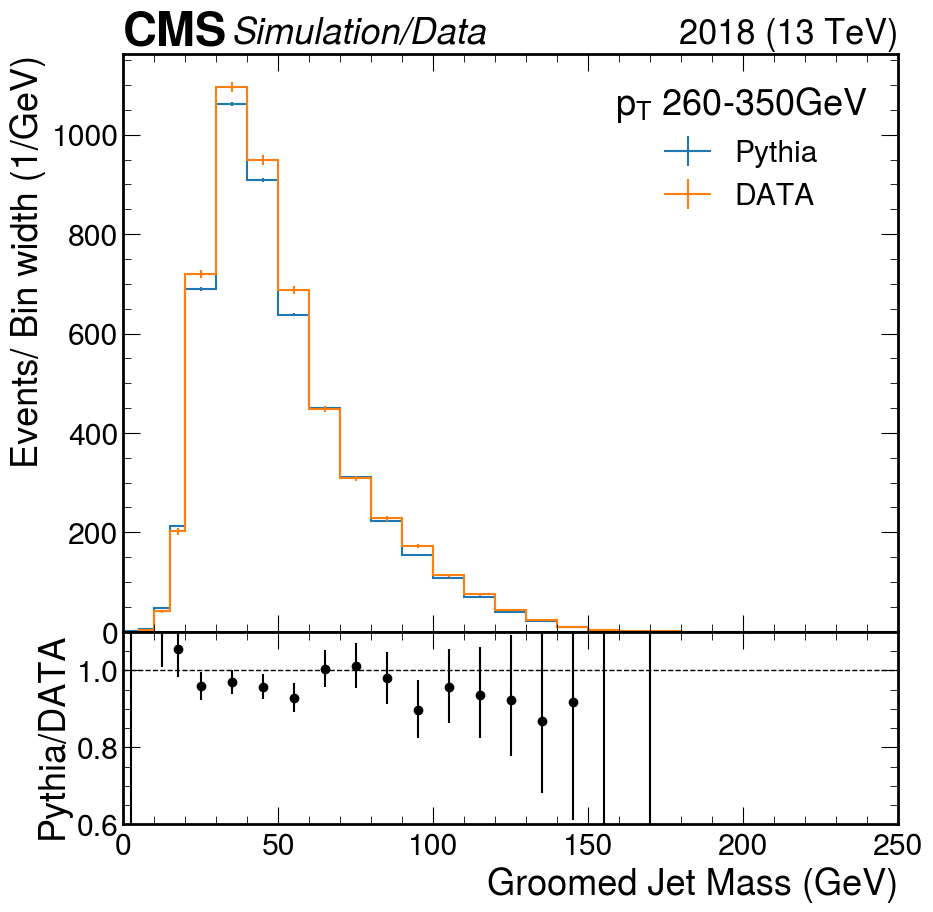

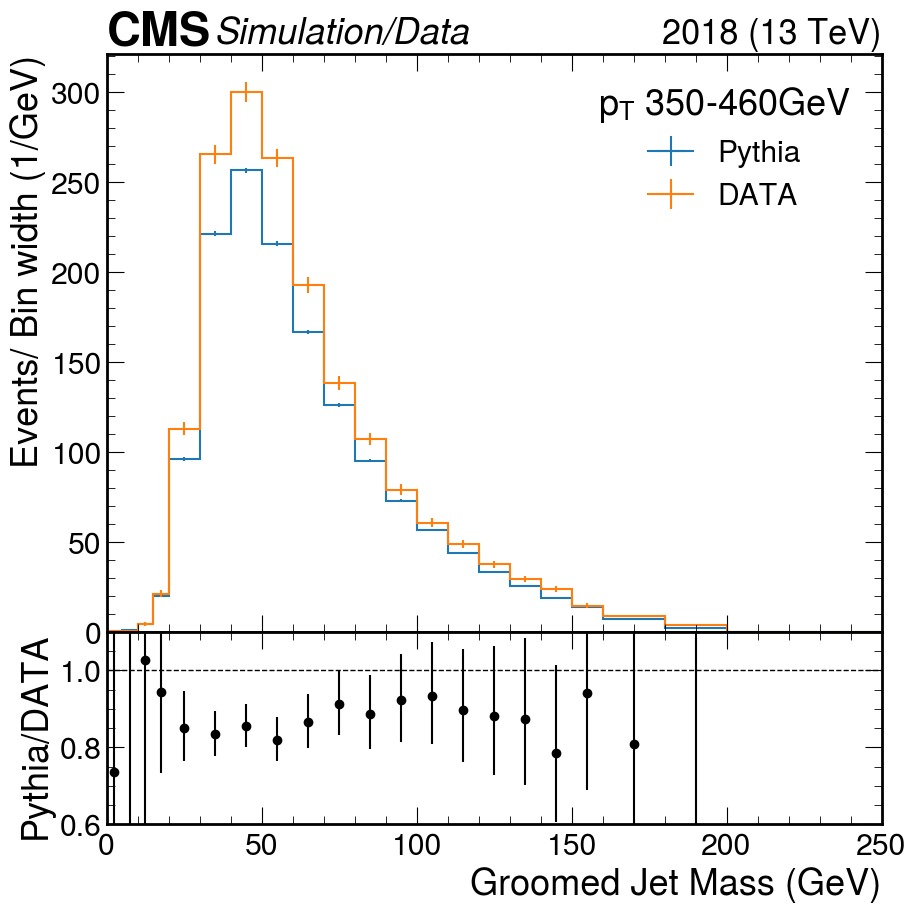

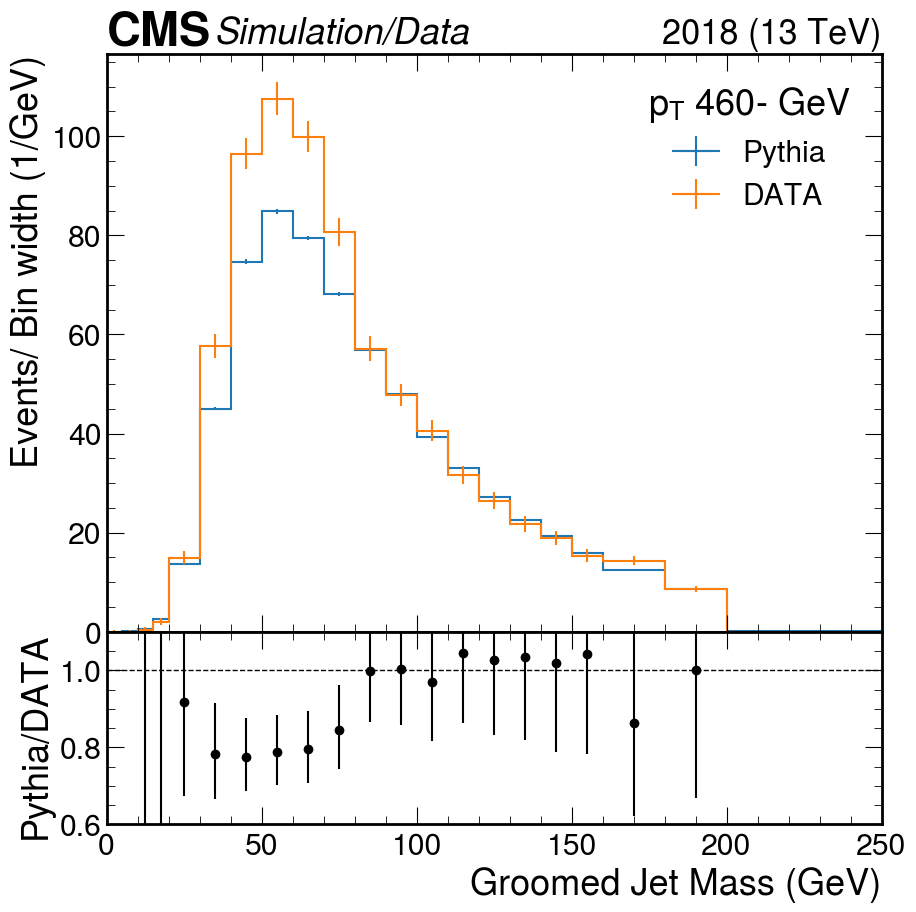

In [168]:
ptstrings = ["200-260", "260-350", "350-460", "460- " ]
for i in range(4):
    mreco_bin_widths = output_pythia['ptjet_mjet_u_reco'].project('dataset','mreco')["UL18NanoAODv9", :].axes['mreco'].widths
    h1 = output_pythia['ptjet_mjet_u_reco'].project('dataset','ptreco','mreco')["UL18NanoAODv9",i, :]
    h2 = output_data['ptjet_mjet_u_reco'].project('ptreco', 'mreco')[i, :]
    h1[:] = h1.view()/mreco_bin_widths
    h2[:] = h2.view()/mreco_bin_widths
    h1.plot_ratio(
        h2, 
        rp_ylabel=r"Pythia/DATA",
        rp_num_label="Pythia",
        rp_denom_label="DATA",
        rp_uncert_draw_type="line", 
    )
    fig = plt.gcf()
    axes = fig.get_axes()
    
    # Set y-axis to logarithmic scale
    #axes = fig.get_axes()
    #axes[0].set_yscale('log')
    axes[1].set_ylim(0.6, 1.1)
    plt.xlim(00, 250)
    axes[0].set_ylabel('Events/ Bin width (1/GeV)')
    axes[0].legend(title = r'$p_T$ ' + ptstrings[i] + 'GeV ')
    axes[1].set_xlabel(r' Groomed Jet Mass (GeV)')
    
    hep.cms.label('Simulation/Data', data = True, year = '2018', ax = axes[0], )
    plt.show()

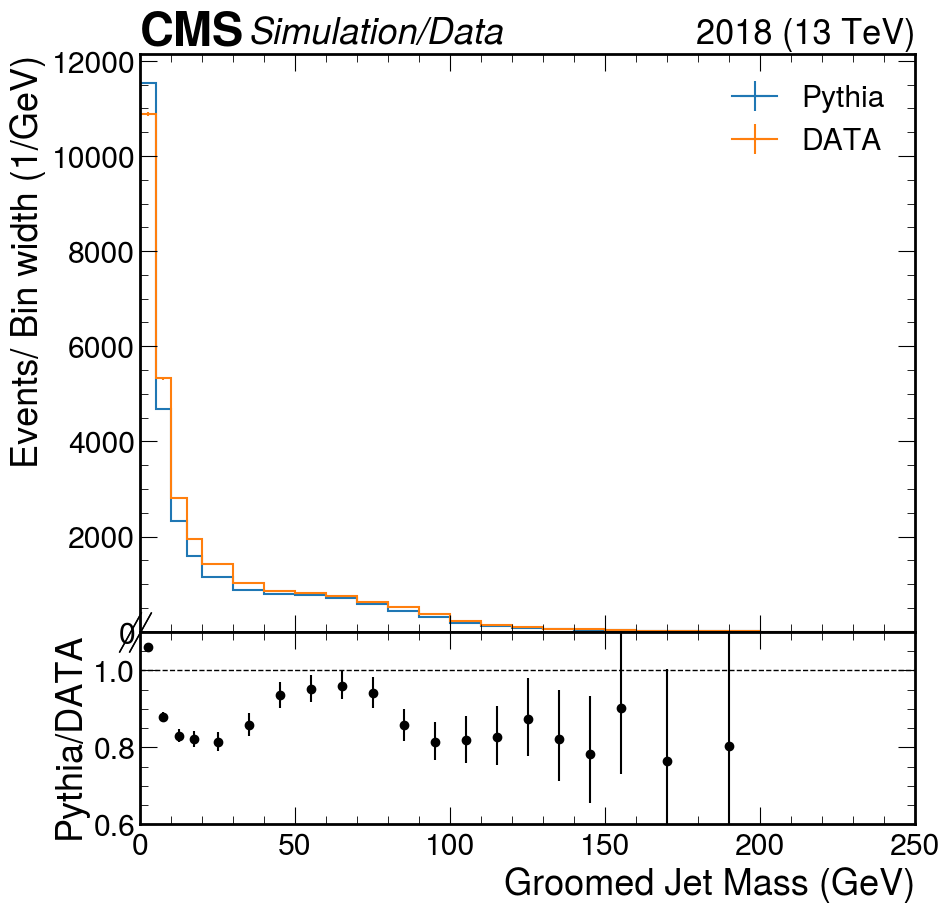

In [158]:
#fig, ax = plt.subplots()
mreco_bin_widths = output_pythia['ptjet_mjet_g_reco'].project('dataset','mreco')["UL18NanoAODv9", :].axes['mreco'].widths
h1 = output_pythia['ptjet_mjet_g_reco'].project('dataset','mreco')["UL18NanoAODv9", :]
h2 = output_data['ptjet_mjet_g_reco'].project('mreco')
h1[:] = h1.view()/mreco_bin_widths
h2[:] = h2.view()/mreco_bin_widths
h1.plot_ratio(
    h2, 
    rp_ylabel=r"Pythia/DATA",
    rp_num_label="Pythia",
    rp_denom_label="DATA",
    rp_uncert_draw_type="line", 
)
fig = plt.gcf()
axes = fig.get_axes()

# Set y-axis to logarithmic scale
#axes = fig.get_axes()
#axes[0].set_yscale('log')
axes[1].set_ylim(0.6, 1.1)
plt.xlim(00, 250)
axes[0].set_ylabel('Events/ Bin width (1/GeV)')
axes[1].set_xlabel(r' Groomed Jet Mass (GeV)')

hep.cms.label('Simulation/Data', data = True, year = '2018', ax = axes[0], )
plt.show()

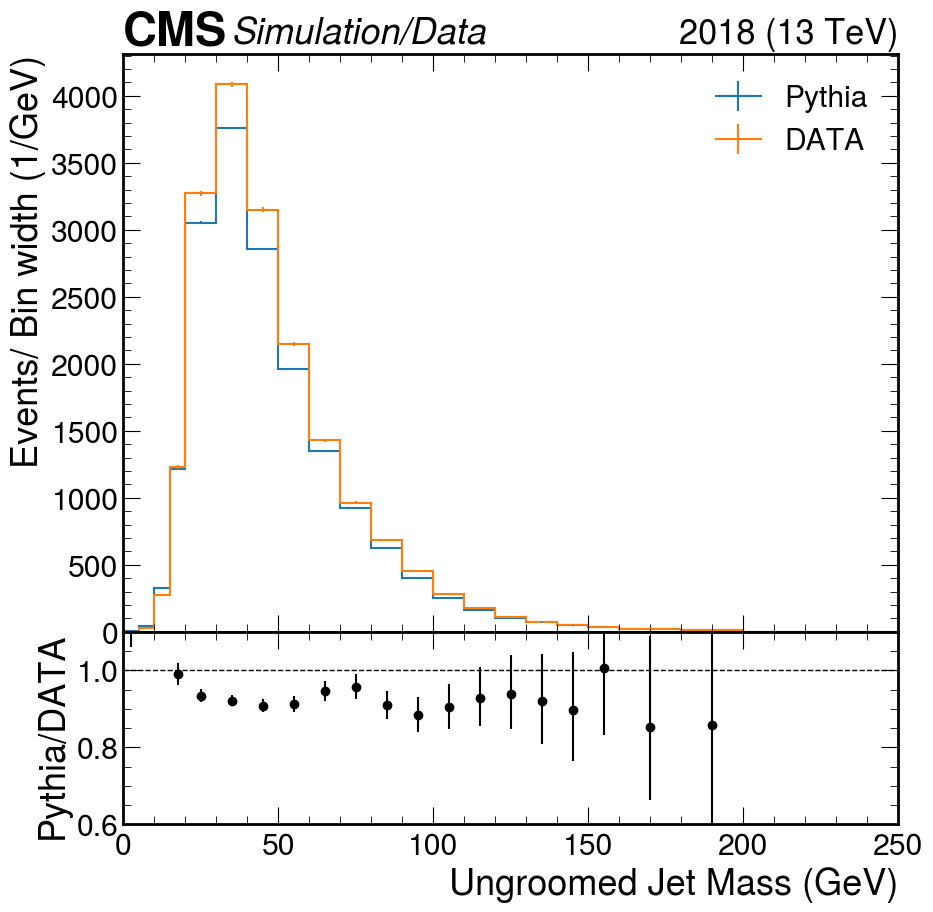

In [160]:
mreco_bin_widths = output_pythia['ptjet_mjet_u_reco'].project('dataset','mreco')["UL18NanoAODv9", :].axes['mreco'].widths
h1 = output_pythia['ptjet_mjet_u_reco'].project('dataset','mreco')["UL18NanoAODv9", :]
h2 = output_data['ptjet_mjet_u_reco'].project('mreco')
h1[:] = h1.view()/mreco_bin_widths
h2[:] = h2.view()/mreco_bin_widths
h1.plot_ratio(
    h2, 
    rp_ylabel=r"Pythia/DATA",
    rp_num_label="Pythia",
    rp_denom_label="DATA",
    rp_uncert_draw_type="line", 
)
fig = plt.gcf()
axes = fig.get_axes()

# Set y-axis to logarithmic scale
#axes = fig.get_axes()
#axes[0].set_yscale('log')
axes[1].set_ylim(0.6, 1.1)
plt.xlim(00, 250)
axes[0].set_ylabel('Events/ Bin width (1/GeV)')
axes[1].set_xlabel(r' Ungroomed Jet Mass (GeV)')

hep.cms.label('Simulation/Data', data = True, year = '2018', ax = axes[0], )
plt.show()

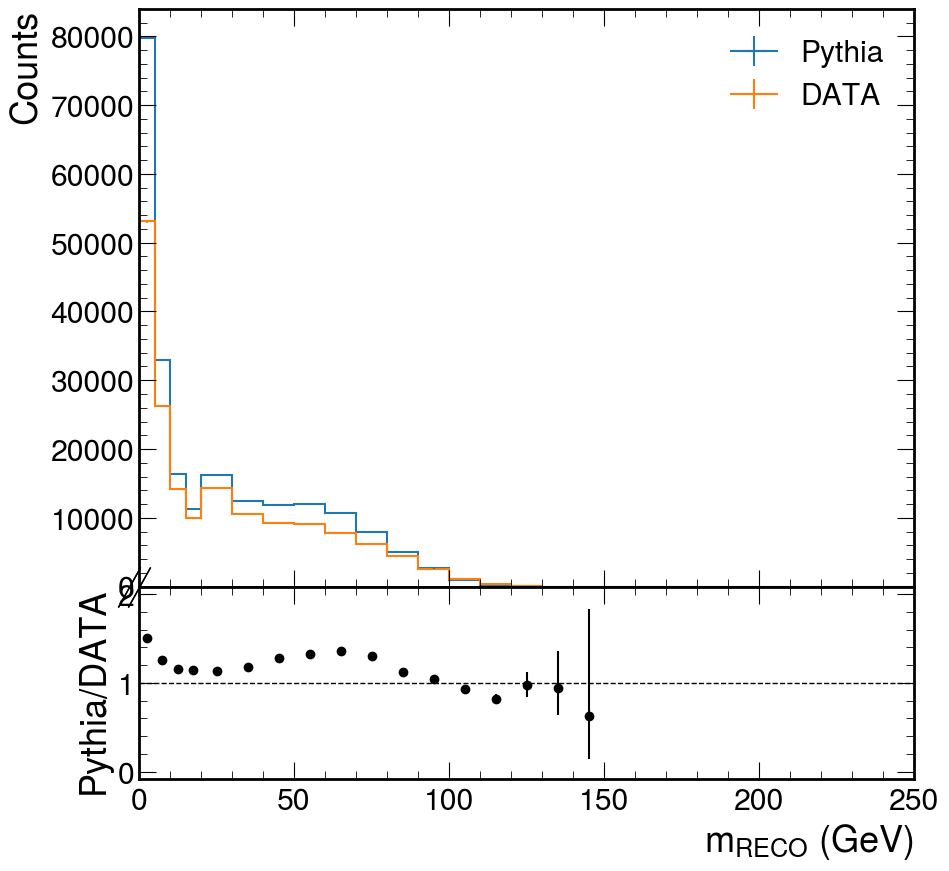

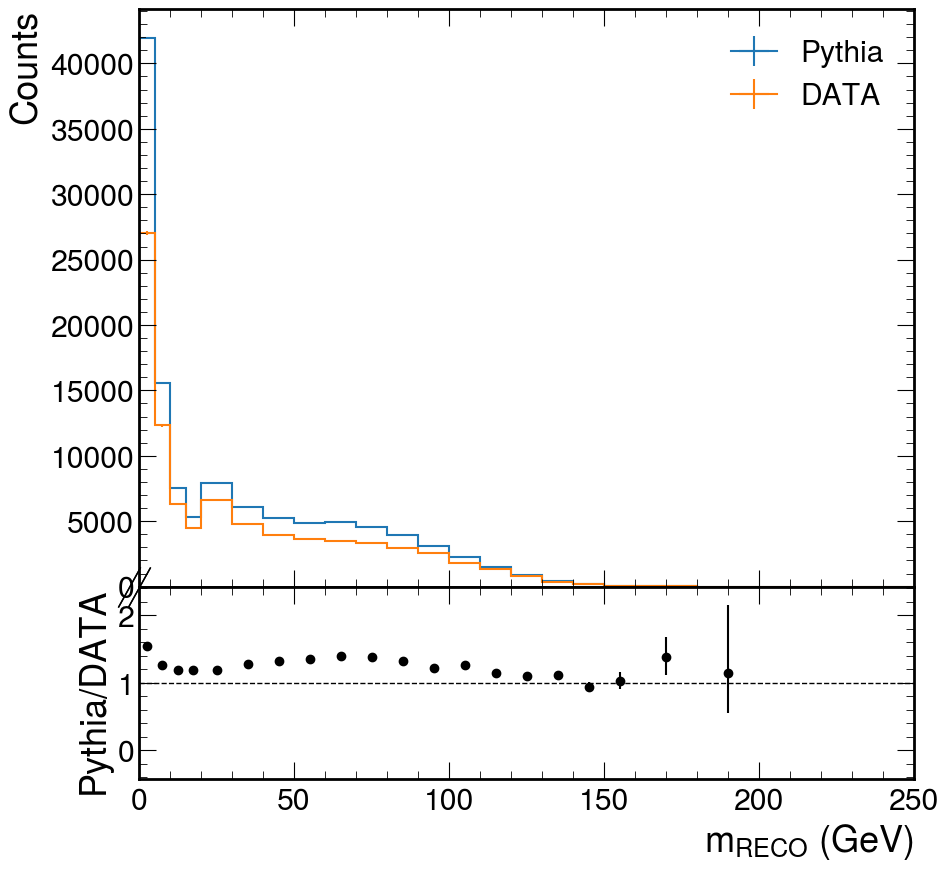

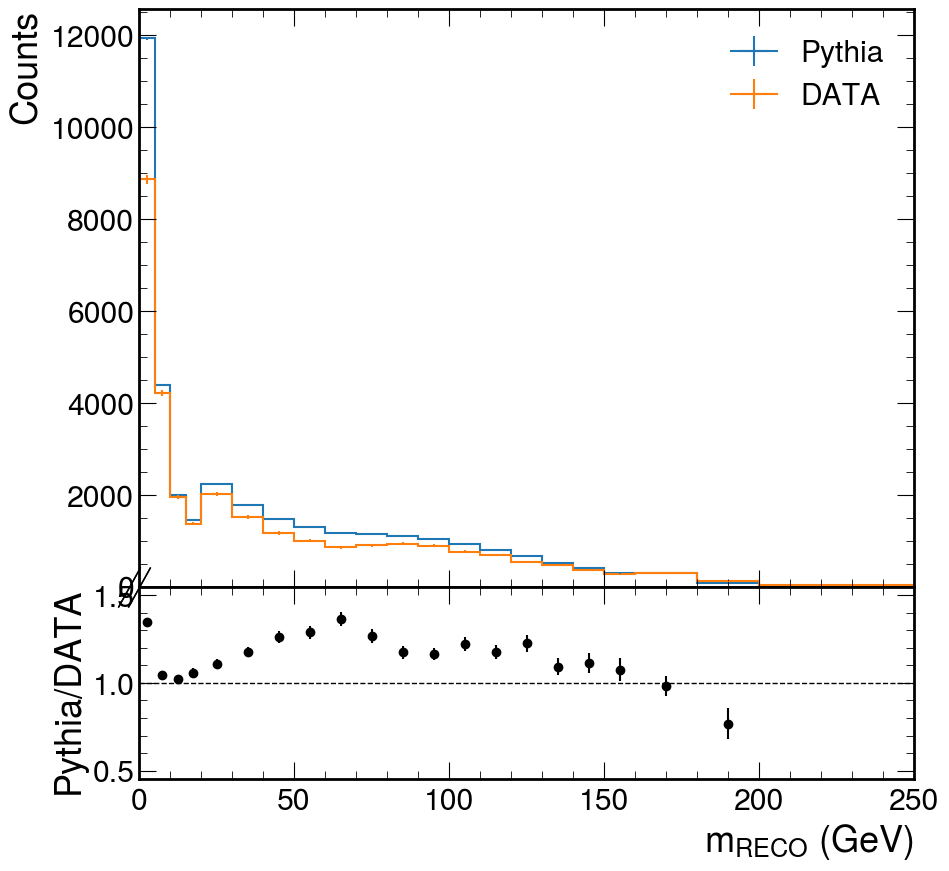

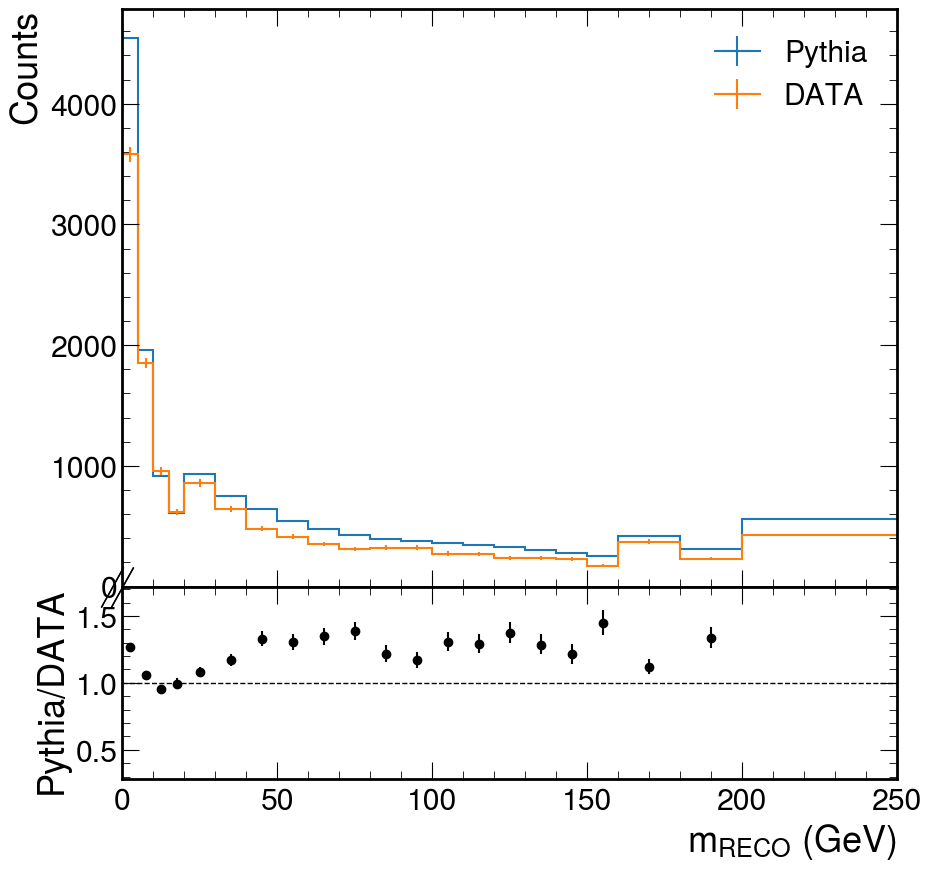

In [102]:
for i in range(4):
    output_pythia['ptjet_mjet_g_reco'].project('ptreco', 'mreco')[i, :].plot_ratio(output_data['ptjet_mjet_g_reco'].project('ptreco', 'mreco')[i, :], 
                                                                                    rp_ylabel=r"Pythia/DATA",
                                                                                    rp_num_label="Pythia",
                                                                                    rp_denom_label="DATA",
                                                                                    rp_uncert_draw_type="line"
                                                                                  )
    
    plt.xlim(0, 250)
    plt.show()

(0.0, 250.0)

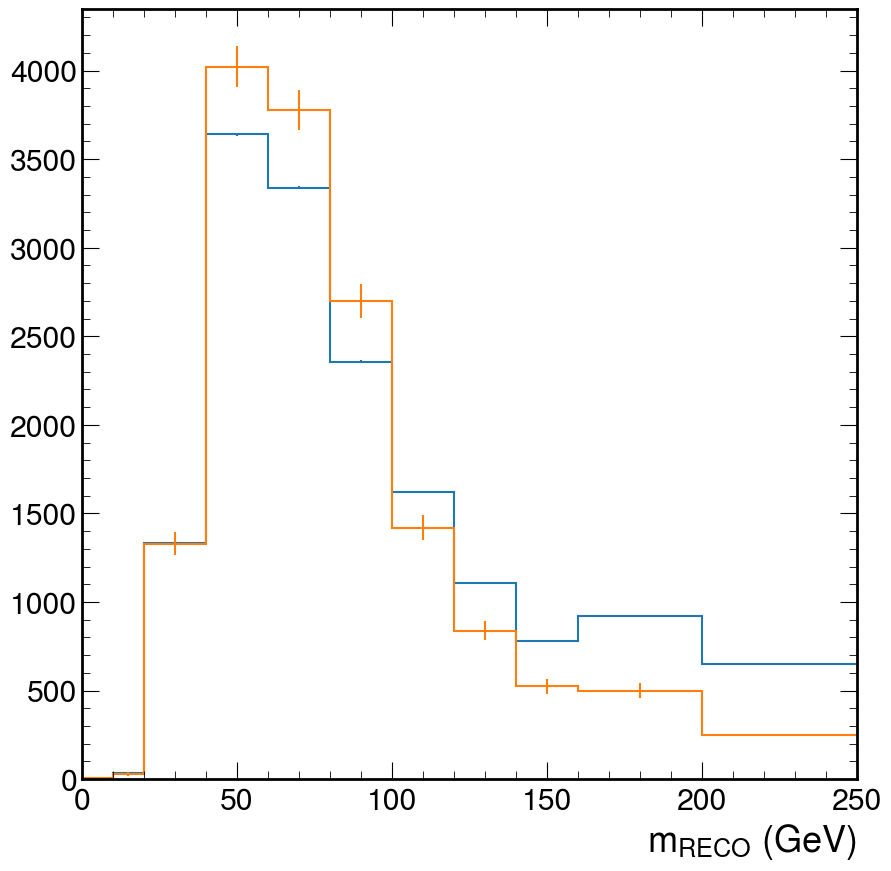

In [103]:

#output_pythia['response_matrix_u'].project('ptgen', 'mgen')[3, :].plot()
output_pythia['response_matrix_u'].project('ptreco', 'mreco')[3, hist.rebin(2)].plot()
scale = output_pythia['response_matrix_u'].project('ptreco', 'mreco')[3, hist.rebin(2)][:hist.loc(201)].sum().value/ output_herwig['response_matrix_u'].project('ptreco', 'mreco')[3, hist.rebin(2)][:hist.loc(201)].sum().value
((scale)*output_herwig['response_matrix_u']).project('ptreco', 'mreco')[3, hist.rebin(2)].plot()
plt.xlim(0,250)

(0.0, 250.0)

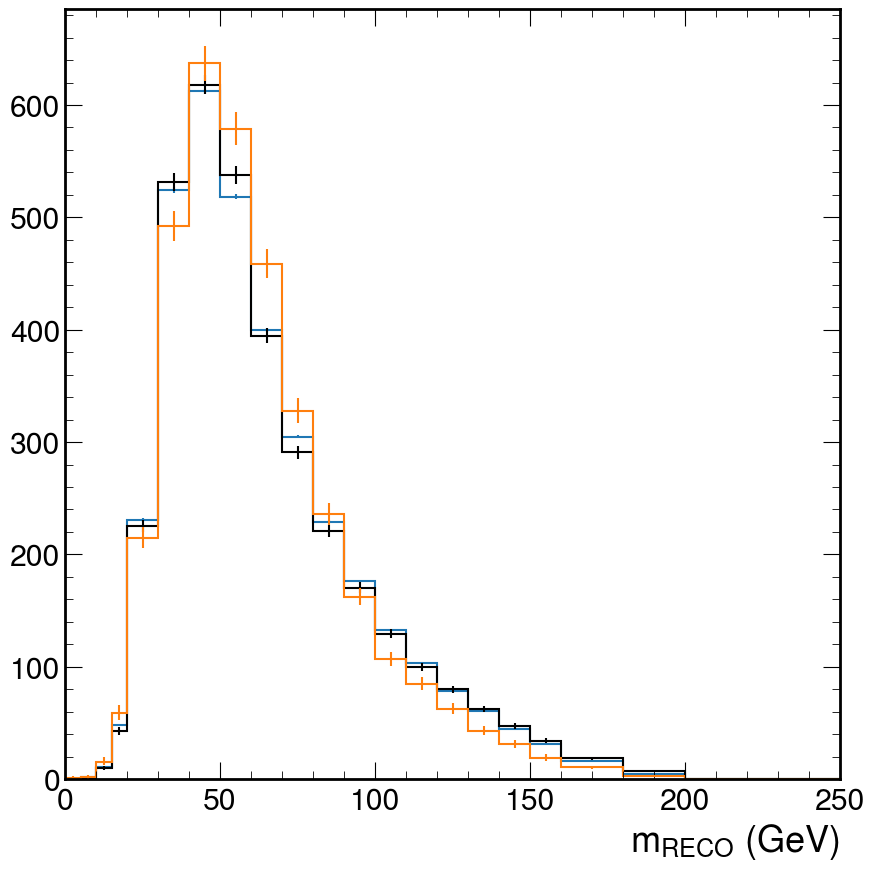

In [109]:
i = 2
output_pythia['response_matrix_u'].project('ptreco', 'mreco')[i, :].plot(binwnorm = 1)
scale = output_pythia['response_matrix_u'].project('ptreco', 'mreco')[i, :][:hist.loc(201)].sum().value/ output_data['ptjet_mjet_u_reco'].project('ptreco', 'mreco')[i, :][:hist.loc(201)].sum().value
((scale)*output_data['ptjet_mjet_u_reco']).project('ptreco', 'mreco')[i, :].plot(binwnorm = 1, color = 'k')
scale = output_pythia['response_matrix_u'].project('ptreco', 'mreco')[i, :][:hist.loc(201)].sum().value/ output_herwig['response_matrix_u'].project('ptreco', 'mreco')[i, :][:hist.loc(201)].sum().value

((scale)*output_herwig['response_matrix_u']).project('ptreco', 'mreco')[i, :].plot(binwnorm = 1)
plt.xlim(0,250)

(0.0, 250.0)

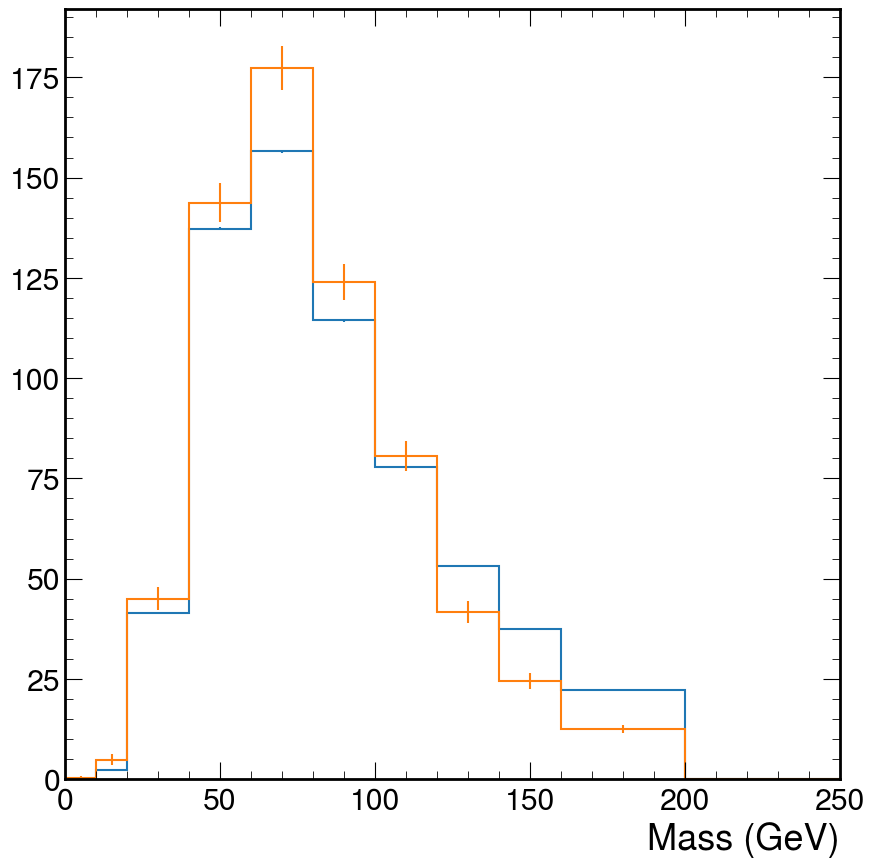

In [88]:
output_pythia['response_matrix_u'].project('ptgen', 'mgen')[3, :].plot(binwnorm = 1)
scale = output_pythia['response_matrix_u'].project('ptgen', 'mgen')[3, :][:hist.loc(201)].sum().value/ output_herwig['response_matrix_u'].project('ptgen', 'mgen')[3, :][:hist.loc(201)].sum().value
((scale)*output_herwig['response_matrix_u']).project('ptgen', 'mgen')[3, :].plot(binwnorm = 1)
plt.xlim(0,250)

In [75]:
import pickle
import numpy as np
filename = 'outputs/herwig_updated.pkl'
with open(filename, 'rb') as f:
    output_herwig = pickle.load(f)

import pickle
filename = 'outputs/pythia_2011.pkl'
with open(filename, 'rb') as f:
    output_pythia = pickle.load(f)

import pickle
filename = 'outputs/data_combined.pkl'
with open(filename, 'rb') as f:
    output_data = pickle.load(f)

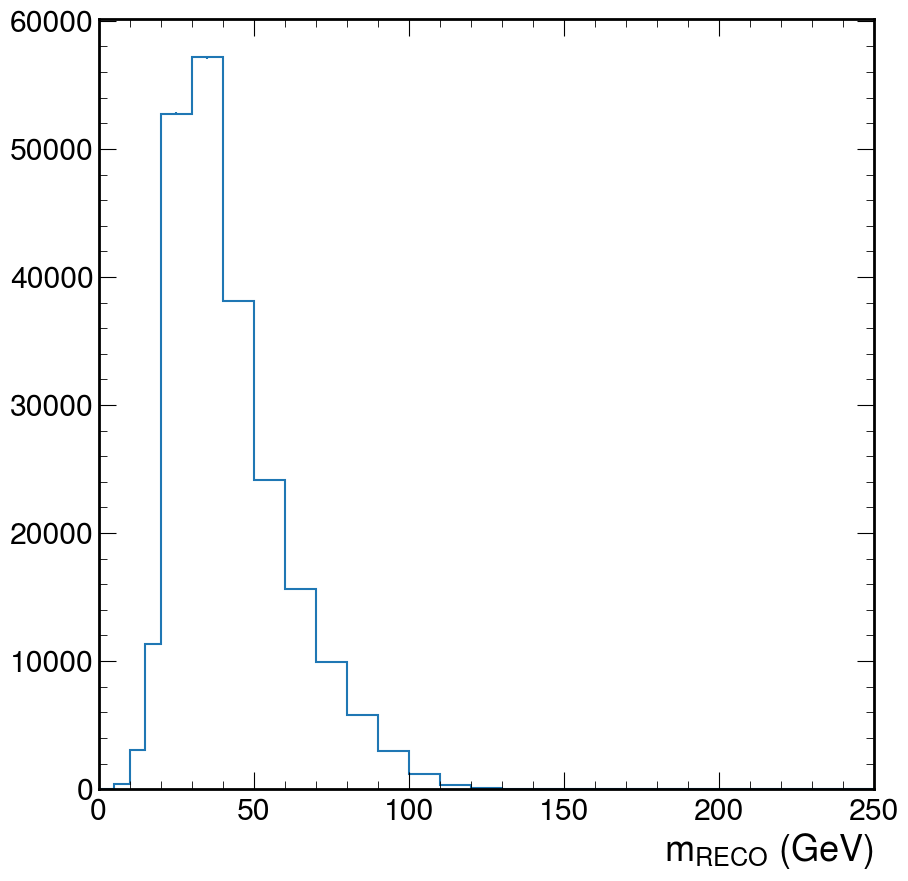

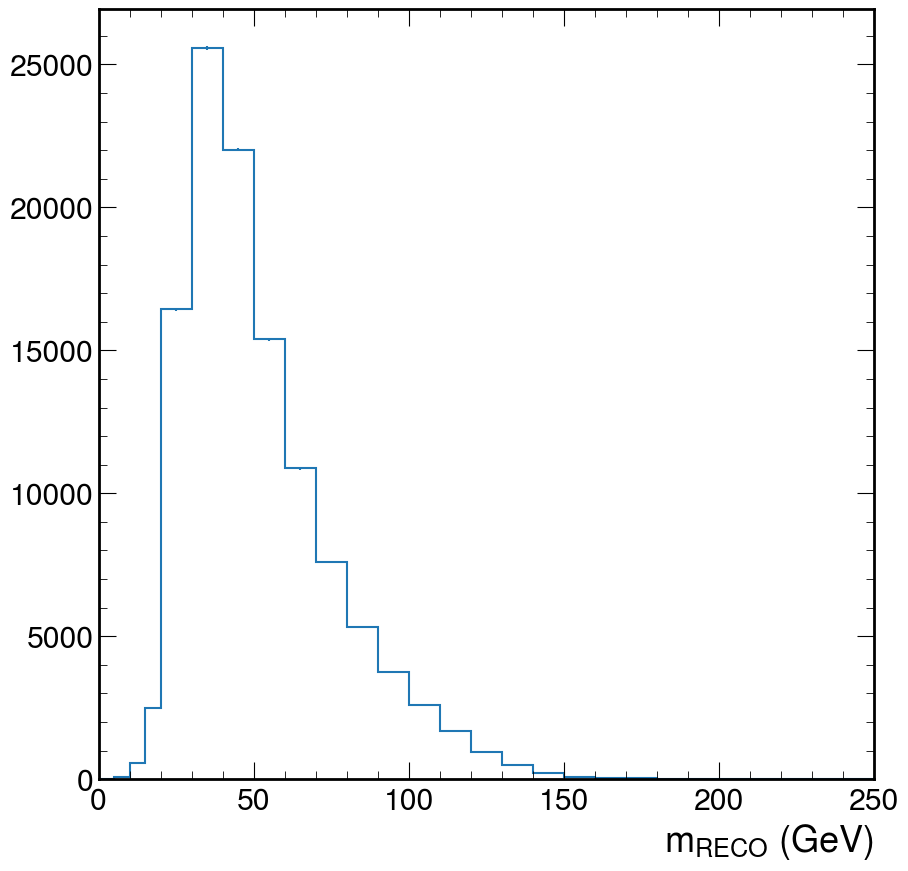

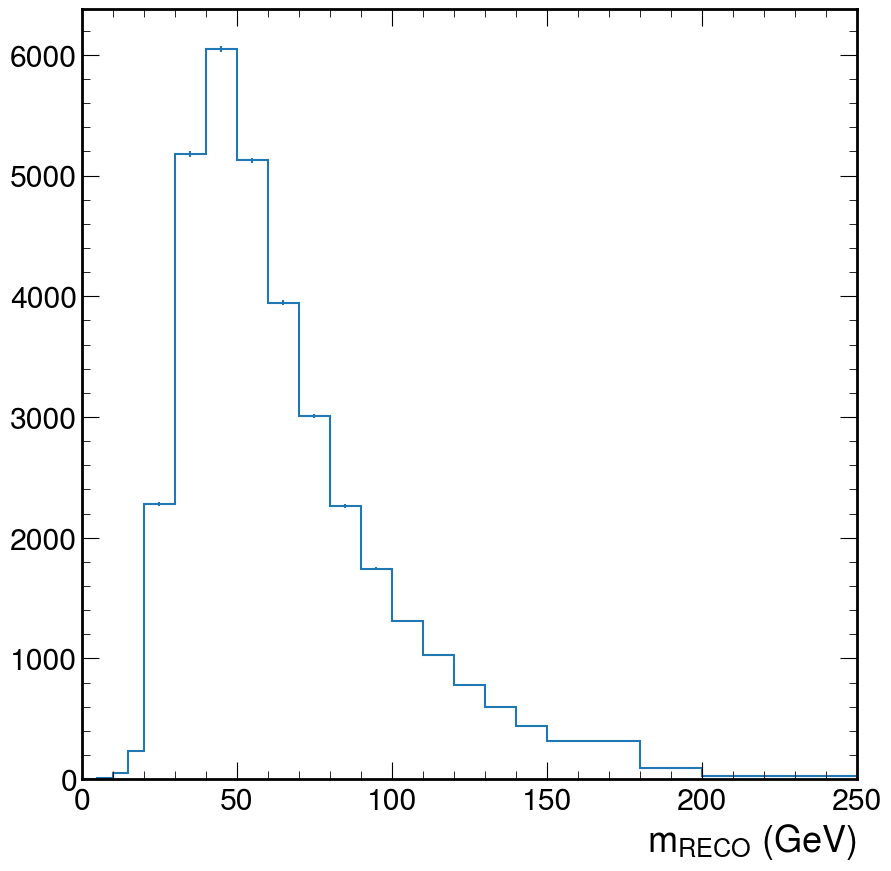

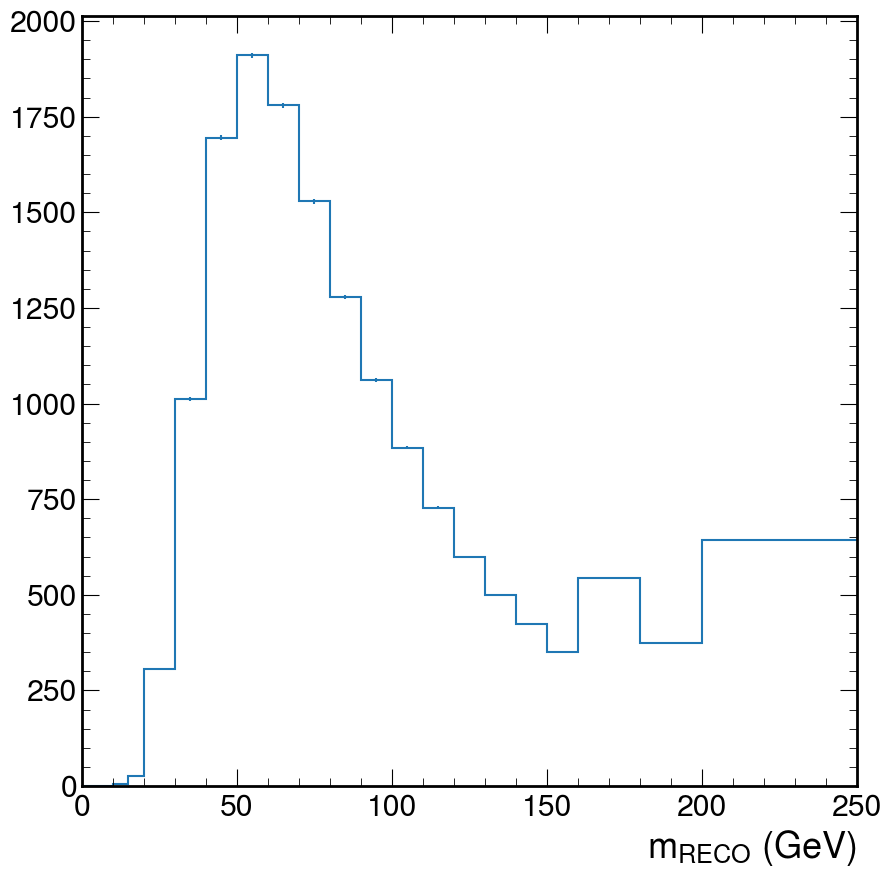

In [76]:
for i in range(4):
    output_pythia['ptjet_mjet_u_reco'].project('ptreco', 'mreco')[i, :].plot()
    
    plt.xlim(0, 250)
    plt.show()

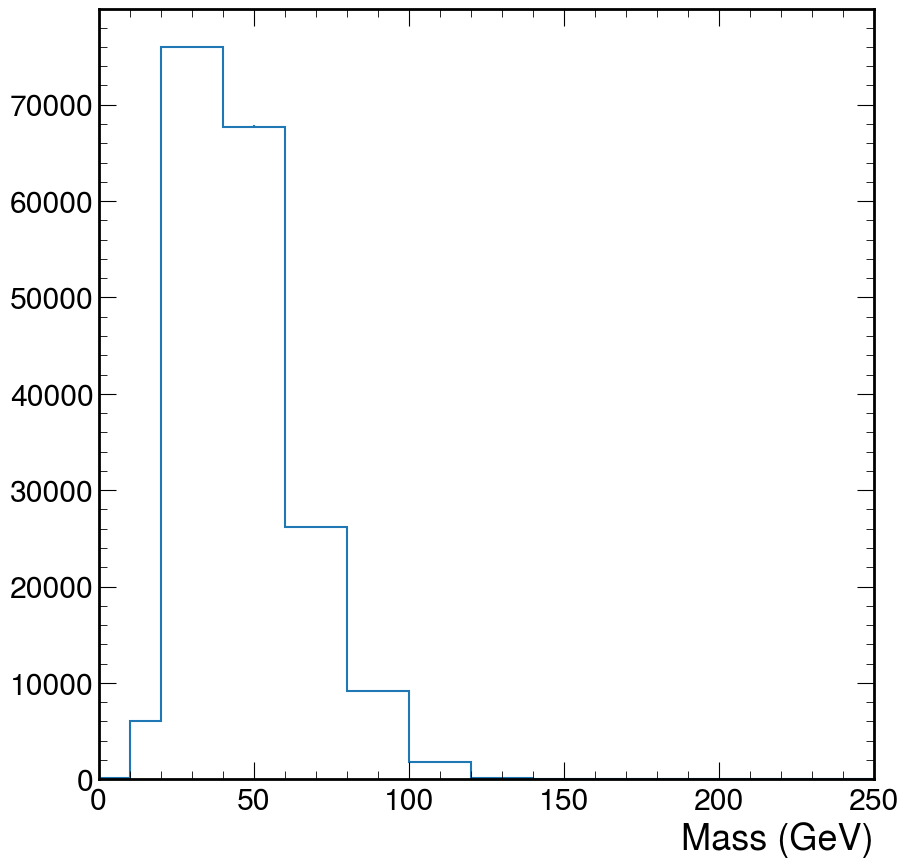

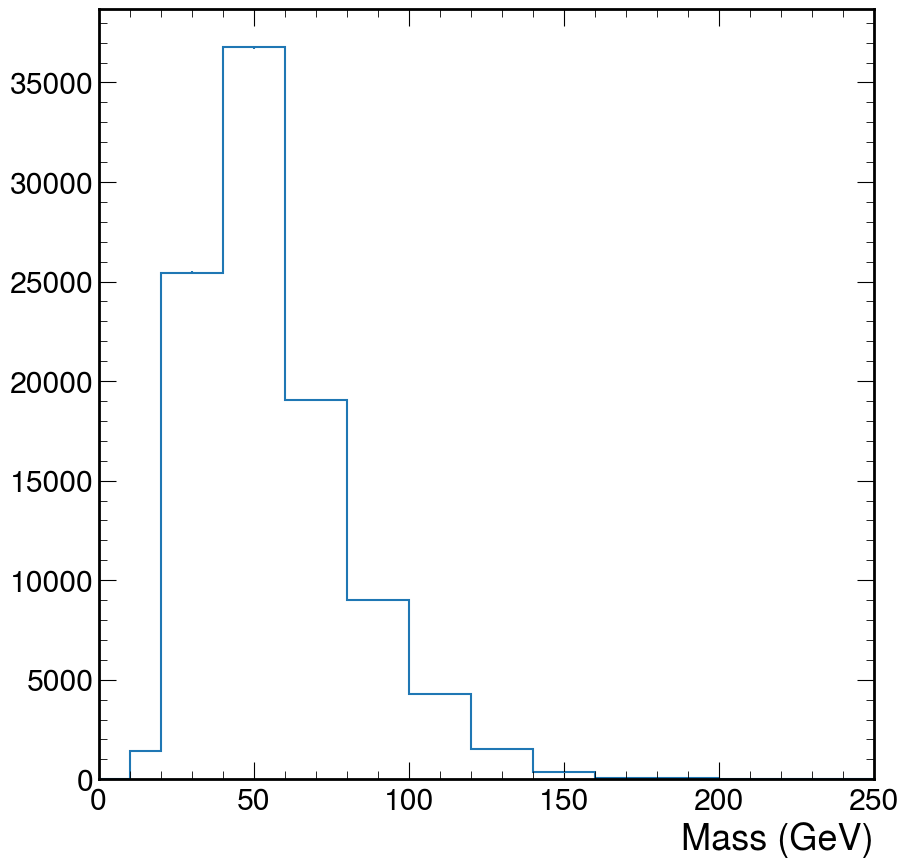

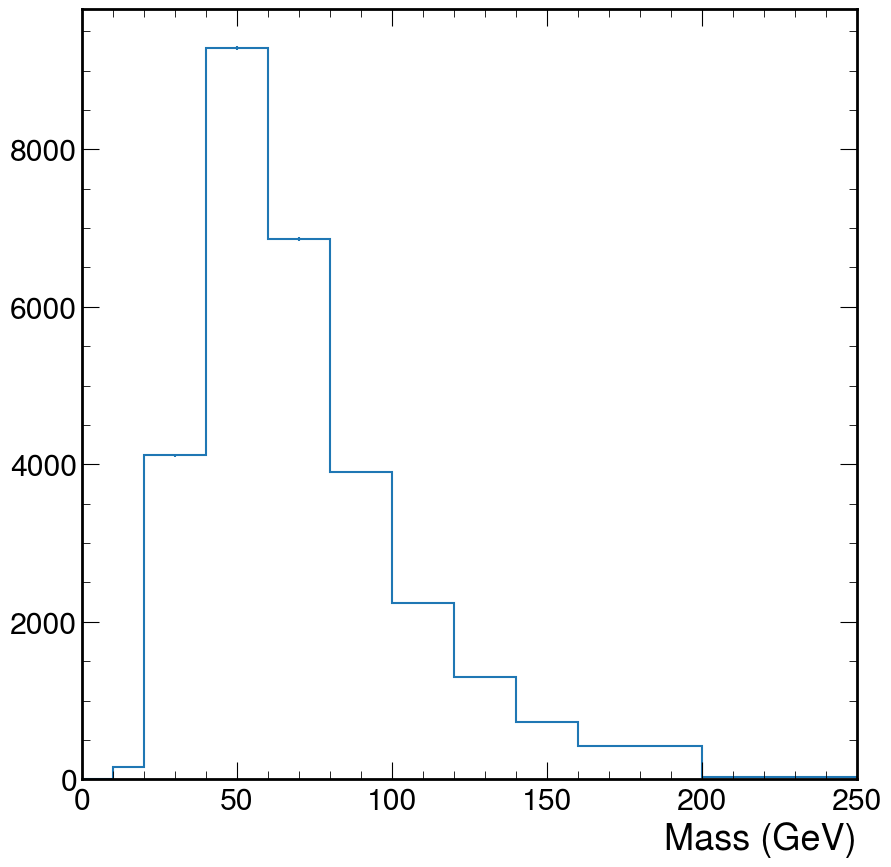

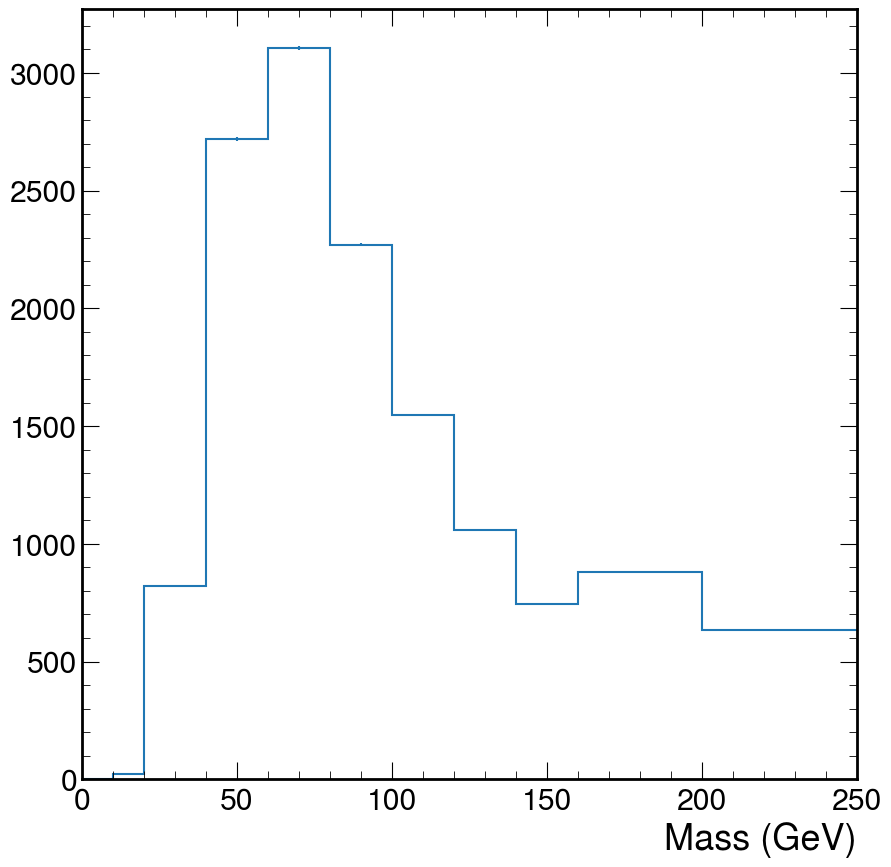

In [77]:
for i in range(4):
    output_pythia['response_matrix_u'].project('ptgen', 'mgen')[i, :].plot()
    
    plt.xlim(0, 250)
    plt.show()

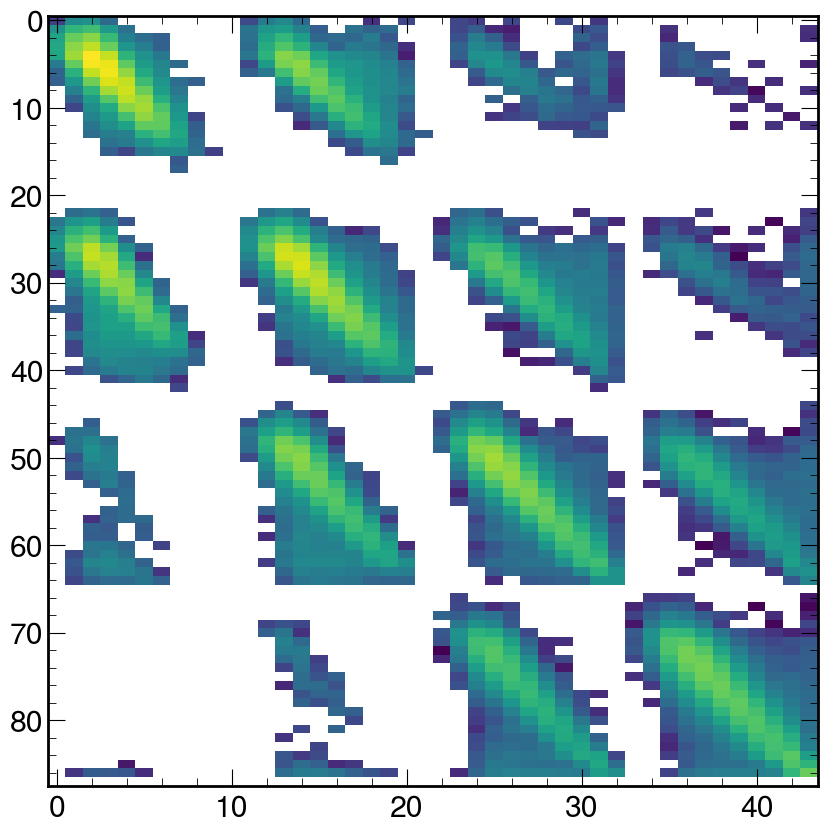

In [94]:
plt.imshow(output_pythia['response_matrix_u'].project("ptreco", 'mreco', 'ptgen', 'mgen').values().reshape( 88, 44), norm = 'log', aspect = 0.5)

22.0